In [1]:
import pandas as pd

In [2]:
reviews_data = pd.read_csv('reviews.csv')

In [3]:
columns_to_keep = ['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']
reviews_data = reviews_data[columns_to_keep]

In [7]:
listings_data = pd.read_excel('listings.xlsx')

In [8]:
# Cleaning prices and dealing with missing values
listings_data['price'] = listings_data['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
listings_data = listings_data.dropna(subset=['price'])

In [9]:
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

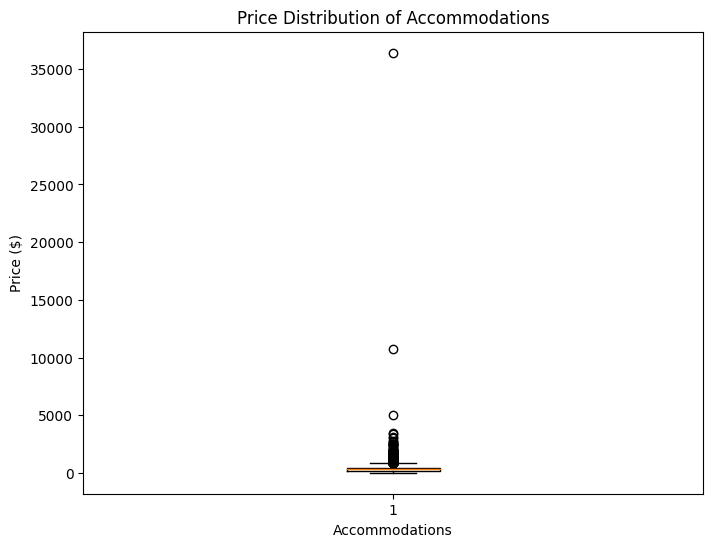

In [13]:
# Task 3: Price column visualization
plt.figure(figsize=(8, 6))
plt.boxplot(listings_data['price'])
plt.xlabel('Accommodations')
plt.title('Price Distribution of Accommodations')
plt.ylabel('Price ($)')
plt.show()

In [10]:
# Task 4: Accommodation distribution on maps
map_accommodations = folium.Map(location=[listings_data['latitude'].mean(), listings_data['longitude'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(map_accommodations)

for index, row in listings_data.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(marker_cluster)

map_accommodations


In [11]:
# Task 5: Summarize the number of accommodations in each market/region
accommodation_count = listings_data['neighbourhood'].value_counts()
print(accommodation_count)

neighbourhood
Surf Coast            2246
Greater Geelong       2141
Colac Otway           1002
Moyne                  499
Warrnambool            357
Corangamite            262
Queenscliffe           229
Glenelg                181
Southern Grampians     114
Name: count, dtype: int64


In [12]:
# Task 6: Summarize the mean price of accommodations in each market/region
mean_price = listings_data.groupby('neighbourhood')['price'].mean()
print(mean_price)

neighbourhood
Colac Otway           371.467066
Corangamite           253.435115
Glenelg               220.016575
Greater Geelong       356.834657
Moyne                 377.963928
Queenscliffe          446.240175
Southern Grampians    213.657895
Surf Coast            460.847284
Warrnambool           266.212885
Name: price, dtype: float64


In [14]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [15]:
# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fredy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [20]:
# Convert 'comments' column to strings
reviews_data['comments'] = reviews_data['comments'].astype(str)

In [21]:
# Perform sentiment analysis for each review comment
reviews_data['sentiment_score'] = reviews_data['comments'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [22]:
# Define a function to classify sentiment based on the sentiment score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [23]:
# Classify sentiment for each review comment
reviews_data['sentiment'] = reviews_data['sentiment_score'].apply(classify_sentiment)

In [27]:
# Store positive and negative comments for analysis
positive_comments = reviews_data[reviews_data['sentiment'] == 'Positive']['comments'].tolist()
negative_comments = reviews_data[reviews_data['sentiment'] == 'Negative']['comments'].tolist()

In [28]:
# Print the number of positive and negative comments
print("Number of positive comments:", len(positive_comments))
print("Number of negative comments:", len(negative_comments))

Number of positive comments: 299224
Number of negative comments: 2623


In [29]:
# Count the number of reviews for each sentiment category
sentiment_counts = reviews_data['sentiment'].value_counts()

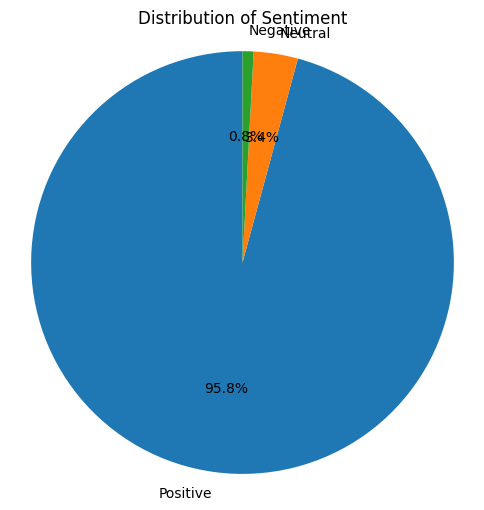

In [30]:
# Plot the distribution of sentiment categories using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()